In [19]:
import cv2
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from skimage import transform  
import shutil

In [20]:
# Path to the predictions CSV file
noktapellgregory37_38_predictions_file_path = '../trained-models/37-38-PELLGREGORY/1.csv'
noktapellgregory47_48_predictions_file_path = '../trained-models/47-48-PELLGREGORY/1.csv'

# Directory to save the text files
noktapellgregory37_38_output_directory = '../data/dataset/predictions/37-38-PELLGREGORY'
noktapellgregory47_48_output_directory = '../data/dataset/predictions/47-48-PELLGREGORY'

# Create the output directory if it doesn't exist
if not os.path.exists(noktapellgregory37_38_output_directory):
    os.makedirs(noktapellgregory37_38_output_directory)
if not os.path.exists(noktapellgregory47_48_output_directory):
    os.makedirs(noktapellgregory47_48_output_directory)

# Read the CSV file
with open(noktapellgregory37_38_predictions_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Extract the file name
        file_name = row['file']
        # Extract the coordinates and convert to integers
        coordinates = [(int(float(row[f'{i}_x'])), int(float(row[f'{i}_y']))) for i in range(5)]
        # Write the coordinates to the text file
        with open(os.path.join(noktapellgregory37_38_output_directory, f'{os.path.splitext(file_name)[0]}.txt'), 'w') as f:
            for i, (x, y) in enumerate(coordinates):
                f.write(f"{x},{y}\n")


In [22]:
# Read the CSV file
with open(noktapellgregory47_48_predictions_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Extract the file name
        file_name = row['file']
        # Extract the coordinates and convert to integers
        coordinates = [(int(float(row[f'{i}_x'])), int(float(row[f'{i}_y']))) for i in range(5)]
        # Write the coordinates to the text file
        with open(os.path.join(noktapellgregory47_48_output_directory, f'{os.path.splitext(file_name)[0]}.txt'), 'w') as f:
            for i, (x, y) in enumerate(coordinates):
                f.write(f"{x},{y}\n")

In [23]:
def plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_file):
    """
    Plots points on images based on coordinates from separate files and displays them.

    Parameters:
        original_coordinates_file (str): Path to the file containing original coordinates.
        prediction_coordinates_file (str): Path to the file containing prediction coordinates.
        image_file (str): Path to the image file.
    """
    img = cv2.imread(image_file)

    # Read coordinates from the original coordinate file
    with open(original_coordinates_file, 'r') as original_file:
        original_coordinates = [line.strip() for line in original_file.readlines()]

    # Draw original points on the image
    print("Original Points")
    for i, original_coord in enumerate(original_coordinates, 1):
        x, y = map(int, original_coord.split(','))
        print(x, y)
        color = (0, 255, 0)  # Green color
        cv2.circle(img, (x, y), 5, color, -1)

    # Read prediction coordinates from the prediction coordinate file
    print("Predicted Points")
    if os.path.exists(prediction_coordinates_file):
        with open(prediction_coordinates_file, 'r') as prediction_file:
            prediction_coordinates = [line.strip() for line in prediction_file.readlines()]
            for i, prediction_coord in enumerate(prediction_coordinates, 1):
                x, y = map(int, prediction_coord.split(','))
                print(x, y)
                color = (0, 0, 255)  # Red color
                cv2.circle(img, (x, y), 5, color, -1)

    # Display the image with points using matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Image with Points: {image_file}")
    plt.axis('off')
    plt.show()

Original Points
813 314
838 308
807 345
858 332
897 286
Predicted Points
812 314
838 309
808 349
859 335
898 286


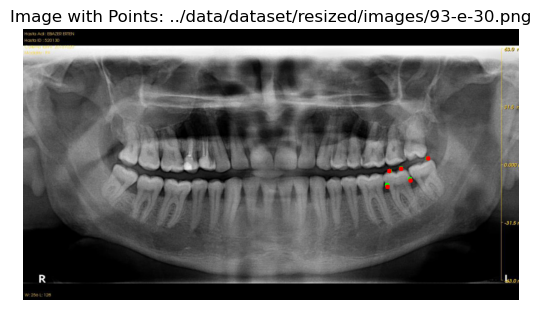

Original Points
759 382
786 376
753 428
808 414
834 368
Predicted Points
756 382
782 375
756 424
808 412
834 368


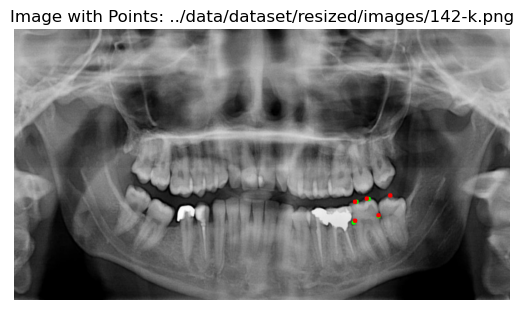

Original Points
787 292
812 280
784 335
832 321
843 389
Predicted Points
782 291
812 279
782 335
829 321
842 272


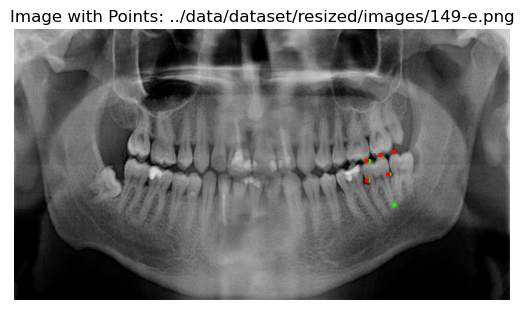

In [24]:
original_coordinates_file = '../data/dataset/resized/annotations/37-38-PELLGREGORY/test/93-e-30.txt'
prediction_coordinates_file = '../data/dataset/predictions/37-38-PELLGREGORY/93-e-30.txt'
image_dir = '../data/dataset/resized/images/93-e-30.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

# *******************

original_coordinates_file = '../data/dataset/resized/annotations/37-38-PELLGREGORY/test/142-k.txt'
prediction_coordinates_file = '../data/dataset/predictions/37-38-PELLGREGORY/142-k.txt'
image_dir = '../data/dataset/resized/images/142-k.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

# *******************

original_coordinates_file = '../data/dataset/resized/annotations/37-38-PELLGREGORY/test/149-e.txt'
prediction_coordinates_file = '../data/dataset/predictions/37-38-PELLGREGORY/149-e.txt'
image_dir = '../data/dataset/resized/images/149-e.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

In [26]:
original_coordinates_file = '../data/dataset/resized/annotations/47-48-PELLGREGORY/test/660-e-27.txt'
prediction_coordinates_file = '../data/dataset/predictions/47-48-PELLGREGORY/660-e-27.txt'
image_dir = '../data/dataset/resized/images/660-e-27.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

# *******************

original_coordinates_file = '../data/dataset/resized/annotations/47-48-PELLGREGORY/test/781-k-20.txt'
prediction_coordinates_file = '../data/dataset/predictions/47-48-PELLGREGORY/781-k-20.txt'
image_dir = '../data/dataset/resized/images/781-k-20.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

# *******************

original_coordinates_file = '../data/dataset/resized/annotations/47-48-PELLGREGORY/test/838-e-23.txt'
prediction_coordinates_file = '../data/dataset/predictions/47-48-PELLGREGORY/838-e-23.txt'
image_dir = '../data/dataset/resized/images/838-e-23.png'
plot_images_with_coordinates(original_coordinates_file, prediction_coordinates_file, image_dir)

FileNotFoundError: [Errno 2] No such file or directory: '../data/dataset/resized/annotations/47-48-PELLGREGORY/test/660-e-27.txt'

In [27]:
def extract_coordinates_from_csv_and_save(csv_file_path, new_csv_file_path):
    coordinates = {}  # Dictionary to store coordinates for each image

    # Check if the CSV file path exists
    if not os.path.isfile(csv_file_path):
        return "CSV file path does not exist"

    # Read the CSV file and extract coordinates
    with open(csv_file_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            # Extract the image name
            image_name = row['file']
            
            # Extract the coordinates and convert to integers
            coords = [(int(float(row[f'{i}_x'])), int(float(row[f'{i}_y']))) for i in range(0, 5)]

            # Store coordinates in the dictionary
            coordinates[image_name] = coords

    # Define the column headers for the new CSV file
    fieldnames = ['IMAGE', '1-X', '1-Y', '2-X', '2-Y', '3-X', '3-Y', '4-X', '4-Y', '5-X', '5-Y']

    # Write the coordinates to the new CSV file
    with open(new_csv_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        # Write the header row
        writer.writeheader()

        # Write each row of coordinates
        for image, coords in coordinates.items():
            row = {'IMAGE': image}
            for i, (x, y) in enumerate(coords, start=1):
                row[f'{i}-X'] = x
                row[f'{i}-Y'] = y
            writer.writerow(row)

    return f"Coordinates extracted from {csv_file_path} and saved to {new_csv_file_path}"

In [32]:
new_csv_file_path = '../trained-models/37-38-PELLGREGORY/37-38-PG-Predictions.csv'
result = extract_coordinates_from_csv_and_save(noktapellgregory37_38_predictions_file_path, new_csv_file_path)
print(result)

Coordinates extracted from ../trained-models/37-38-PELLGREGORY/1.csv and saved to ../trained-models/37-38-PELLGREGORY/37-38-PG-Predictions.csv


In [31]:
new_csv_file_path = '../trained-models/47-48-PELLGREGORY/47-48-PG-Predictions.csv'
result = extract_coordinates_from_csv_and_save(noktapellgregory47_48_predictions_file_path, new_csv_file_path)
print(result)

Coordinates extracted from ../trained-models/47-48-PELLGREGORY/1.csv and saved to ../trained-models/47-48-PELLGREGORY/47-48-PG-Predictions.csv
